In [14]:
import keras
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
pd_shap = pd.read_csv('all_mean_shap.csv',
                      header=0,
                      index_col=0)

all_shap = pd.DataFrame.to_numpy(pd_shap)

In [39]:
used_cols = [3,11,19,23,32,35,40]

shap_chnls = all_shap[used_cols, 1:]

In [52]:
np.sum(shap_chnls, axis=0)

(44,)

In [37]:
ch_names = np.arange(44).tolist()
freqs = np.arange(191.6, 195.9, 0.1).tolist()
for x in range(len(ch_names)):
  ch_names[x] = "Ch %.0f (%.1f)" % (ch_names[x], freqs[x])

In [96]:
np.argsort(shap_chnls, axis=0)[0,-10:] 

temp = np.argpartition(-shap_chnls, 10)
result_args = temp[:,:10]
#print(result_args)

count = np.bincount(result_args.flatten())
print(count)
#np.unique(result_args)

[0 0 0 0 0 0 1 4 3 3 3 1 2 1 0 0 1 1 0 0 3 0 6 2 0 0 2 2 3 1 3 2 3 3 1 0 1
 1 1 0 1 3 5 7]


<BarContainer object of 44 artists>

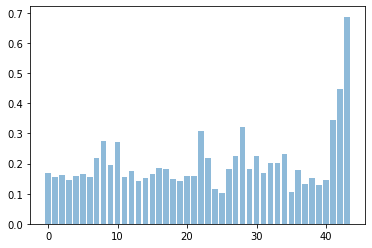

In [53]:
y_pos = np.arange(len(ch_names))

ch = 0
plt.bar(y_pos, np.sum(shap_chnls, axis=0), align='center', alpha=0.5)

#ch = 1
#plt.bar(y_pos, shap_chnls[ch], align='center', alpha=0.5)




In [17]:
all_shap[0,1:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])